In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def load_trajectory(dataset_path='data/training_data_y_up.pkl', index=0):
    with open(dataset_path, 'rb') as f:
        dataset = pickle.load(f)
    # unstable_list = []
    # for i in range(5000):
    #     if not dataset[i]['stable']:
    #         unstable_list.append(i)
    # index = unstable_list[51]
    sample = dataset[22]
    return sample

In [ ]:
def plot_single_trajectory(sample, dt=0.01):
    trajectory = sample['trajectory'] 
    theta = sample['theta']
    is_stable = sample['stable']
    
    # Extract state components
    u1x = trajectory[:, 0]
    u1y = trajectory[:, 1]
    u2x = trajectory[:, 2]
    u2y = trajectory[:, 3]
    v1x = trajectory[:, 4]
    v1y = trajectory[:, 5]
    v2x = trajectory[:, 6]
    v2y = trajectory[:, 7]
    
    time = np.arange(len(trajectory)) * dt
    
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    fig.suptitle(f'Double Spring System Trajectory (Stable: {is_stable})', 
                 fontsize=16, fontweight='bold')
    
    ax = axes[0, 0]
    ax.plot(time, u1x, label='u1x (horiz)', linewidth=2)
    ax.plot(time, u1y, label='u1y (vert)', linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Position (m)')
    ax.set_title('Mass 1 Position')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax = axes[0, 1]
    ax.plot(time, u2x, label='u2x (horiz)', linewidth=2)
    ax.plot(time, u2y, label='u2y (vert)', linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Position (m)')
    ax.set_title('Mass 2 Position')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax = axes[1, 0]
    ax.plot(time, v1x, label='v1x (horiz)', linewidth=2)
    ax.plot(time, v1y, label='v1y (vert)', linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title('Mass 1 Velocity')
    ax.legend()
    ax.grid(True, alpha=0.3)

    ax = axes[1, 1]
    ax.plot(time, v2x, label='v2x (horiz)', linewidth=2)
    ax.plot(time, v2y, label='v2y (vert)', linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Velocity (m/s)')
    ax.set_title('Mass 2 Velocity')
    ax.legend()
    ax.grid(True, alpha=0.3)

    ax = axes[2, 0]
    dist1 = np.sqrt((u1x)**2 + (2-u1y)**2)
    dist2 = np.sqrt((u2x)**2 + (2-u2y)**2)
    ax.plot(time, dist1, label='Distance Mass 1', linewidth=2)
    ax.plot(time, dist2, label='Distance Mass 2', linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Distance (m)')
    ax.set_title('Distance from Origin')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    ax = axes[2, 1]
    speed1 = np.sqrt(v1x**2 + v1y**2)
    speed2 = np.sqrt(v2x**2 + v2y**2)
    ax.plot(time, speed1, label='Speed Mass 1', linewidth=2)
    ax.plot(time, speed2, label='Speed Mass 2', linewidth=2)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Speed (m/s)')
    ax.set_title('Speed Magnitude')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

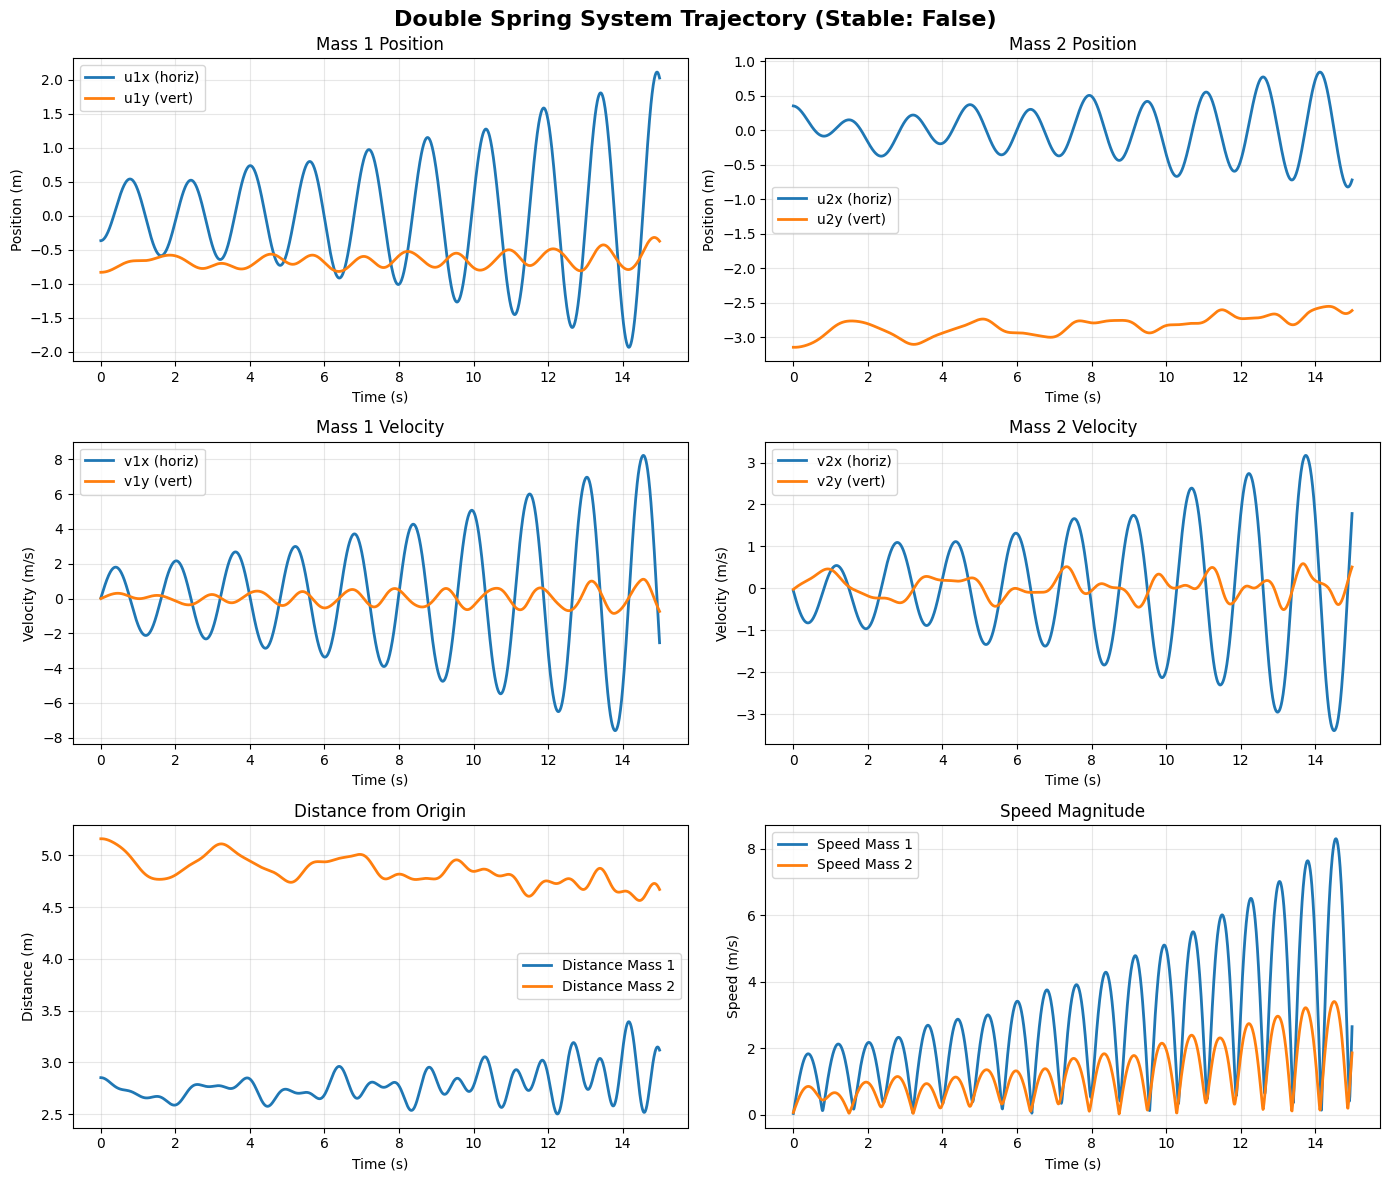

In [4]:
dataset_path = 'data/training_data_y_up.pkl' 
sample = load_trajectory(dataset_path, index=0)
plot_single_trajectory(sample)